# 

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [89]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [90]:
df_train.isnull().sum().sum() / df_train.shape[0] / df_train.shape[1]

np.float64(0.01909582422638905)

In [91]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [92]:
df_train = df_train.loc[df_train["VIP"].isnull() == False]
df_train["VIP"] = df_train["VIP"].astype("int")
df_train["Transported"] = df_train["Transported"].astype("int")

In [93]:
df_train = df_train.loc[(
    (df_train["HomePlanet"].isnull() == False) & 
    (df_train["CryoSleep"].isnull() == False) &
    (df_train["Destination"].isnull() == False)
    )]

In [94]:
categorical_cols = ["HomePlanet", "CryoSleep", "Destination"]
df_train = pd.get_dummies(df_train, columns=categorical_cols, dtype=int)

In [95]:
df_train.describe()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
count,7746.000000,7913.000000,7747.000000,7745.000000,7728.000000,7742.000000,7735.000000,7913.000000,7913.000000,7913.000000,7913.000000,7913.000000,7913.000000,7913.000000,7913.000000,7913.000000
mean,28.843919,0.023885,224.019879,465.953260,177.610766,314.297210,307.803878,0.503349,0.541388,0.252243,0.206369,0.641097,0.358903,0.212941,0.093770,0.693290
std,14.498958,0.152700,664.625341,1637.677731,619.976856,1144.946228,1158.945584,0.500020,0.498316,0.434328,0.404724,0.479709,0.479709,0.409412,0.291527,0.461157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,0.000000,46.000000,77.000000,29.000000,60.000000,47.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7913 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7913 non-null   object 
 1   Cabin                      7736 non-null   object 
 2   Age                        7746 non-null   float64
 3   VIP                        7913 non-null   int64  
 4   RoomService                7747 non-null   float64
 5   FoodCourt                  7745 non-null   float64
 6   ShoppingMall               7728 non-null   float64
 7   Spa                        7742 non-null   float64
 8   VRDeck                     7735 non-null   float64
 9   Name                       7735 non-null   object 
 10  Transported                7913 non-null   int64  
 11  HomePlanet_Earth           7913 non-null   int64  
 12  HomePlanet_Europa          7913 non-null   int64  
 13  HomePlanet_Mars            7913 non-null   int64  
 1

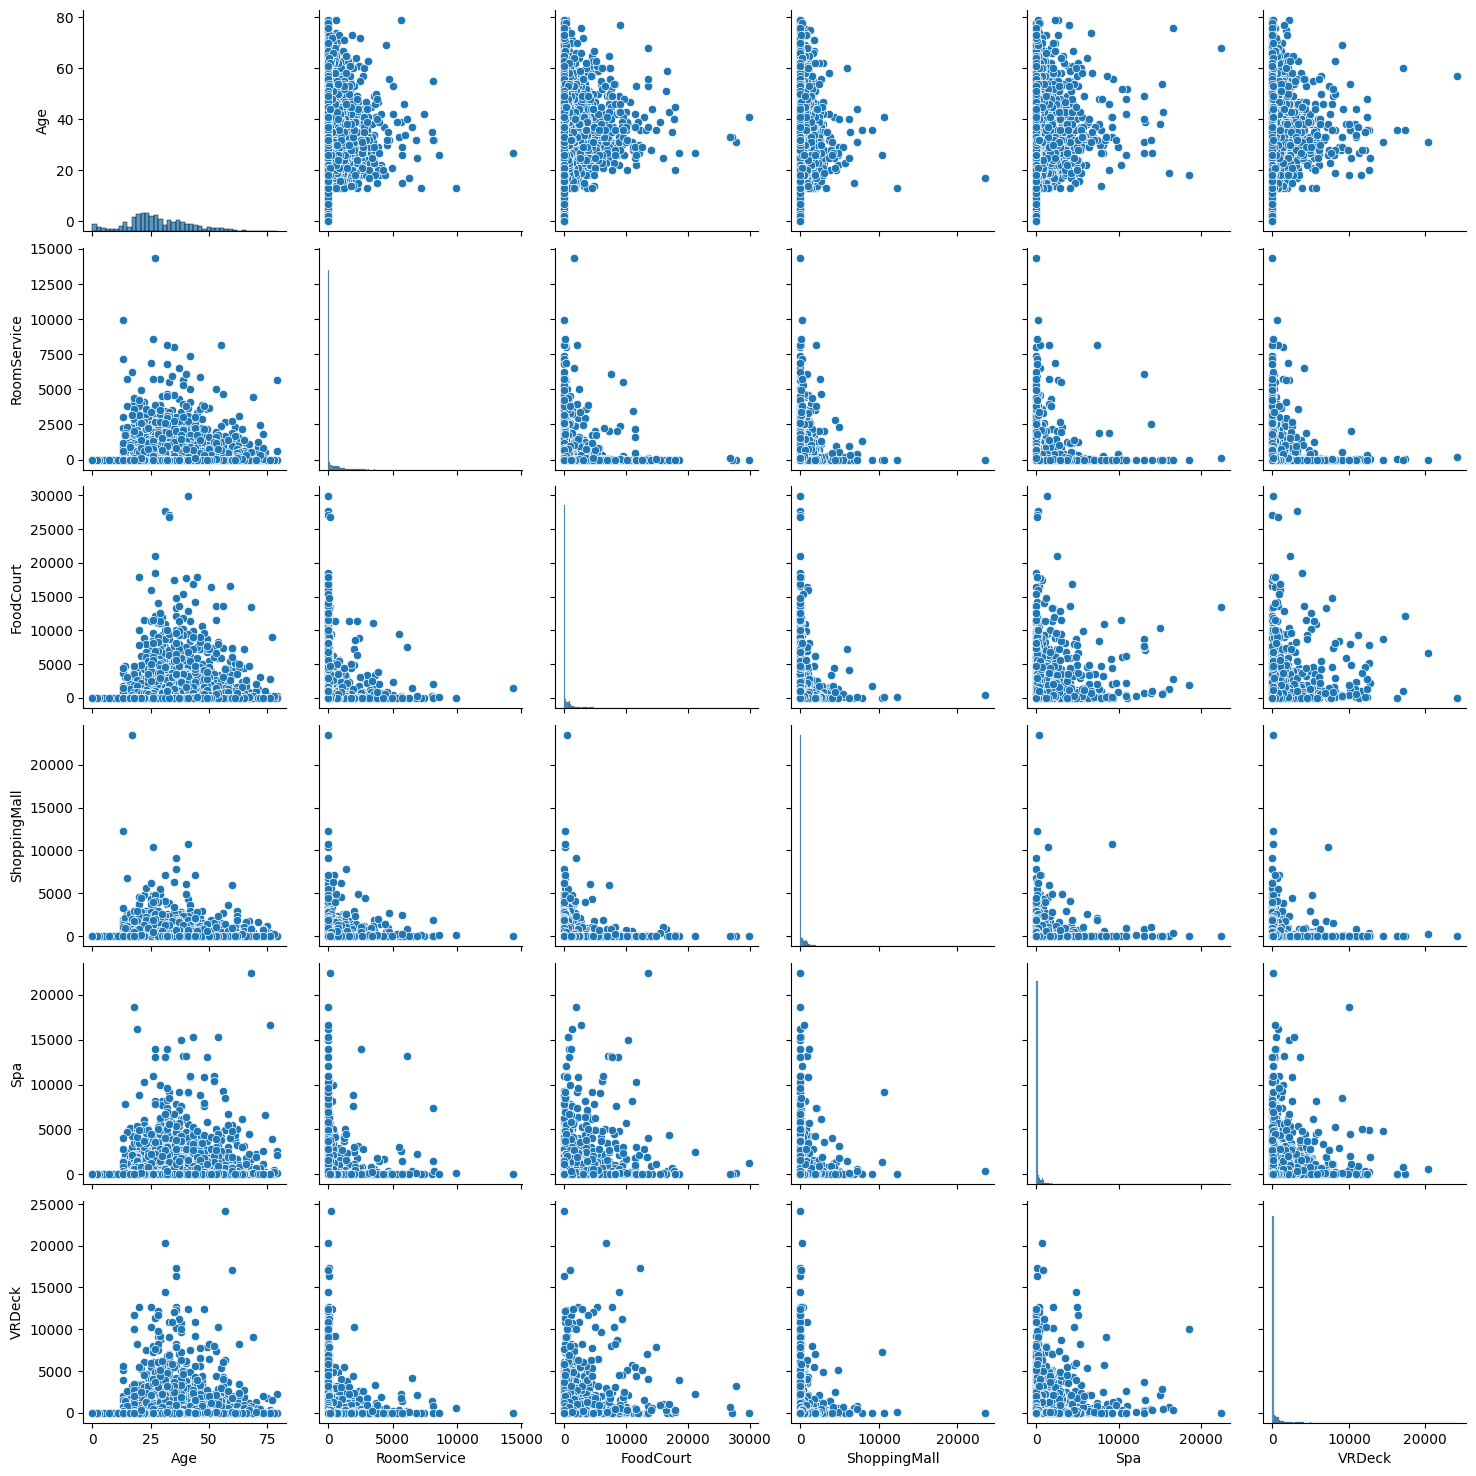

In [98]:
sns.pairplot(df_train.select_dtypes(include="float"))

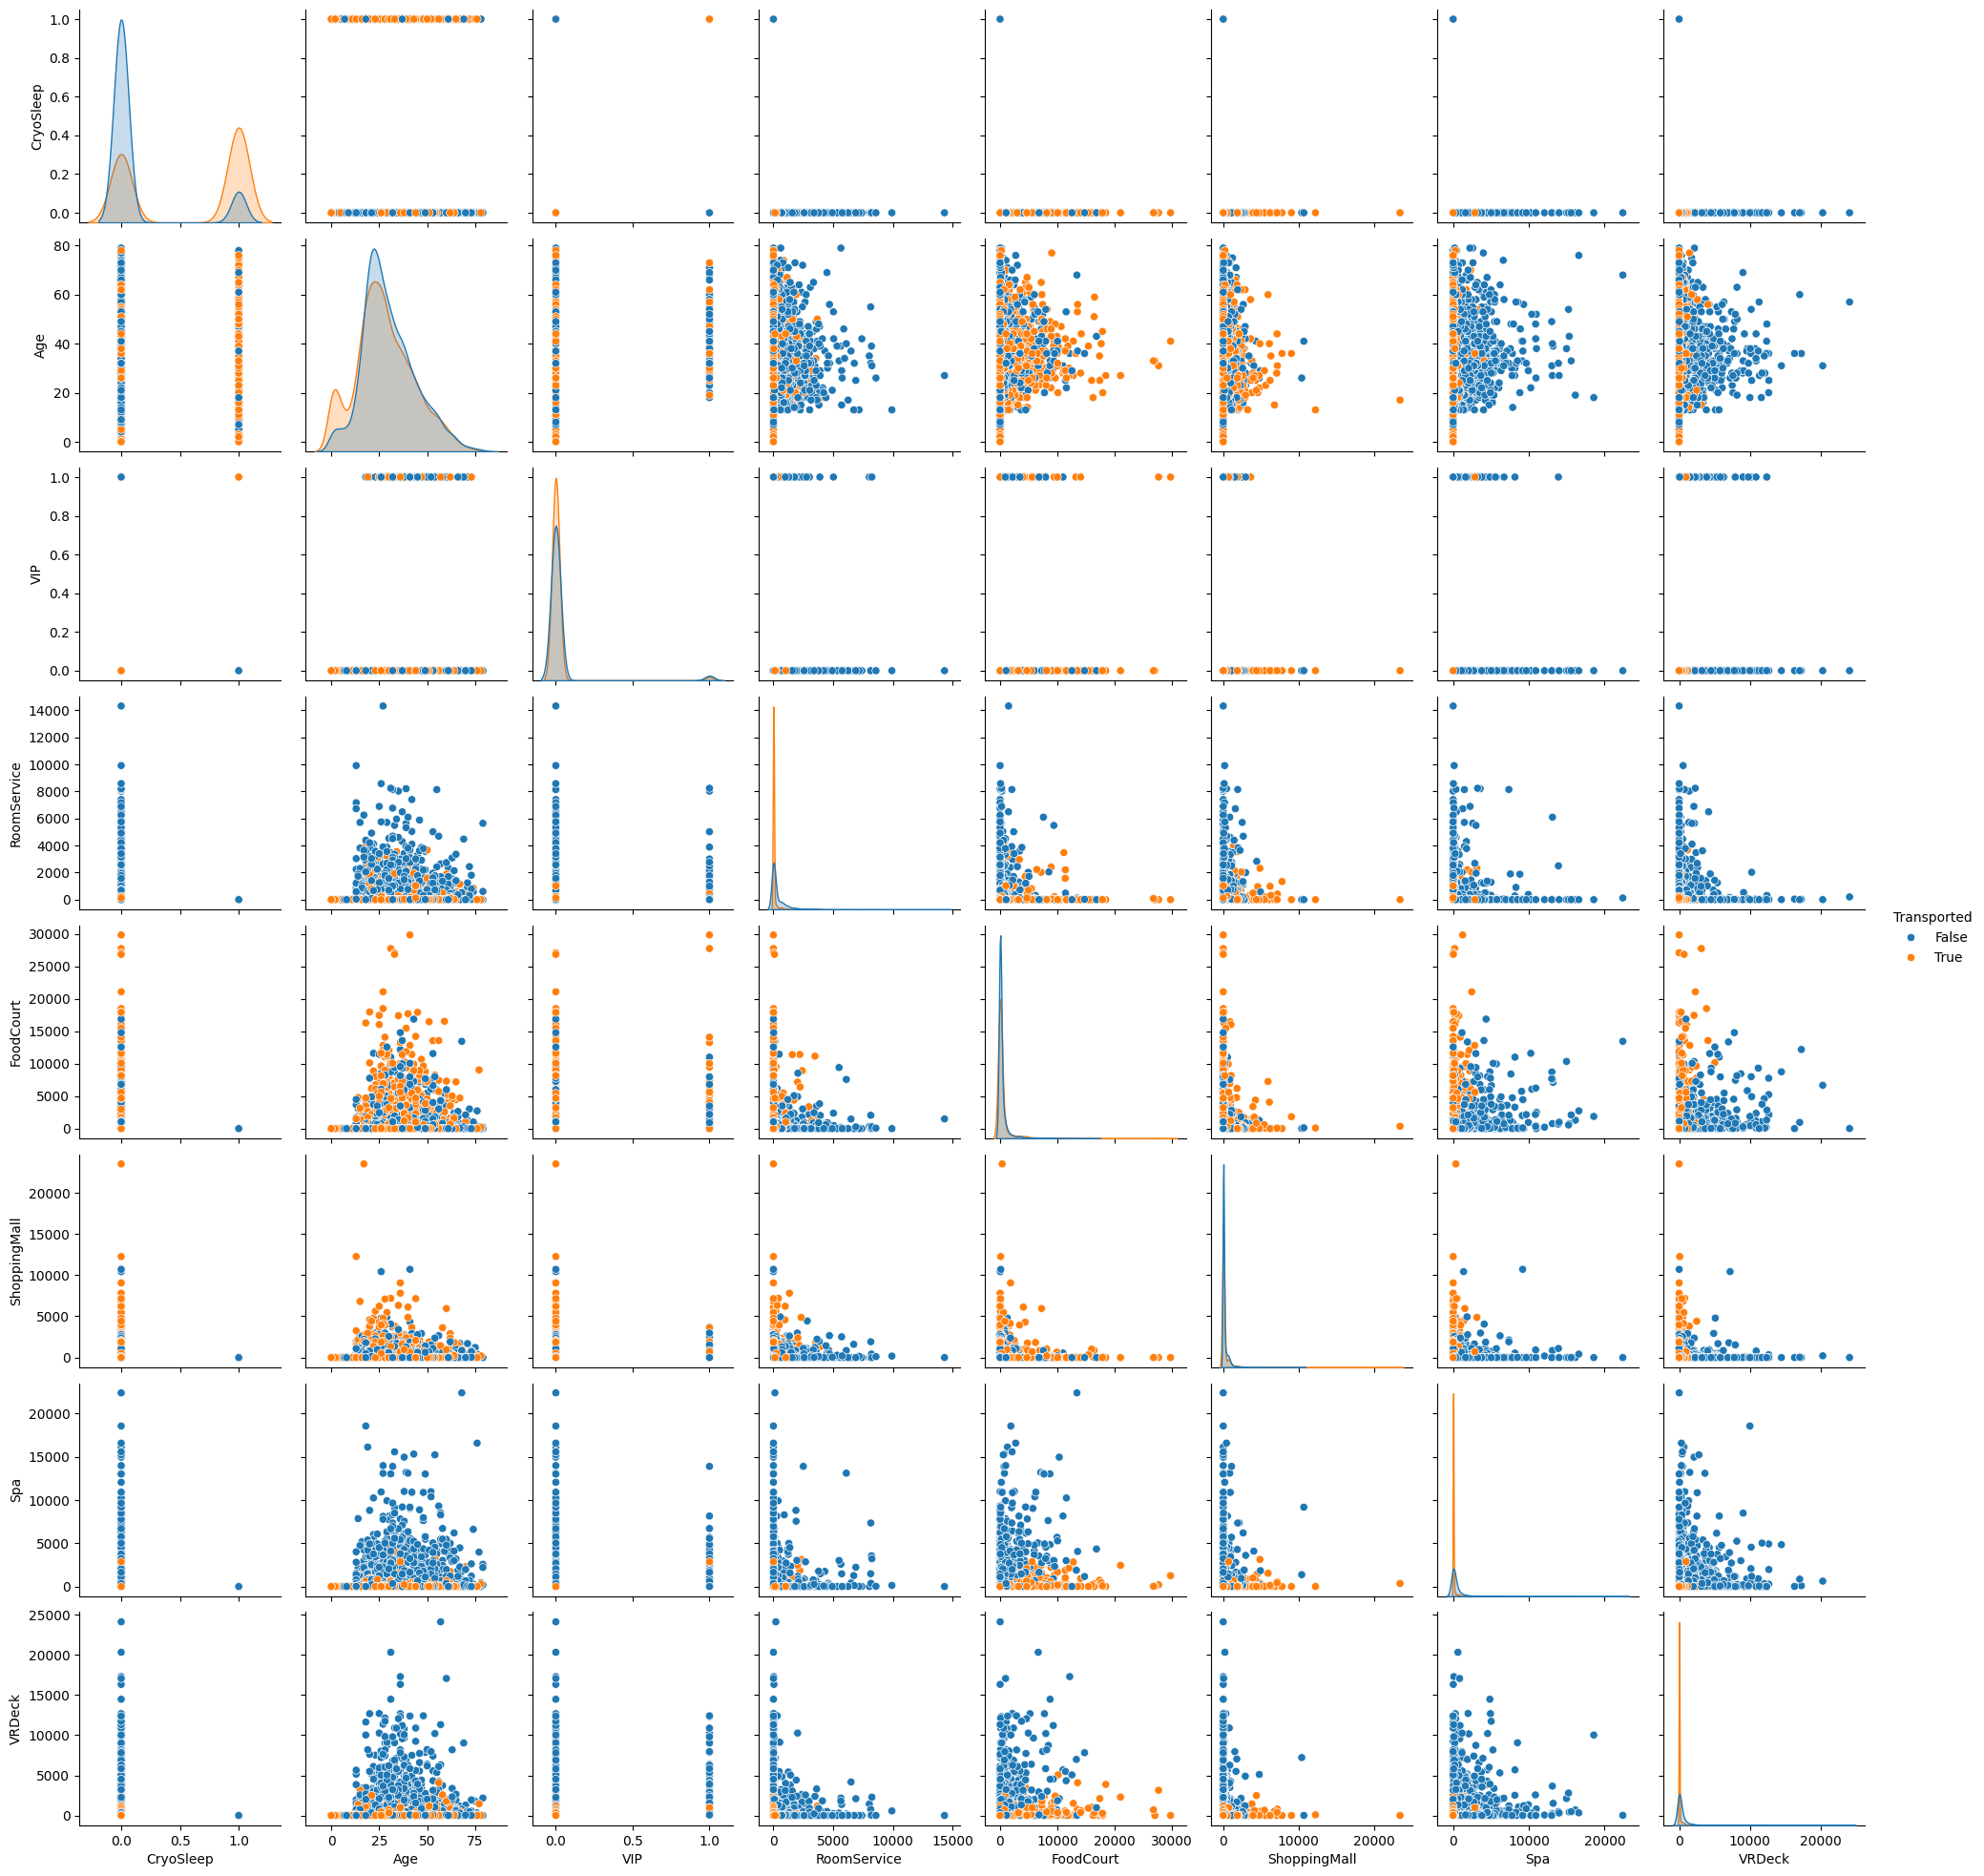

In [ ]:
sns.pairplot(pd.concat([df_train.select_dtypes(include="float"), df_train[["Transported"]]]), hue="Transported")

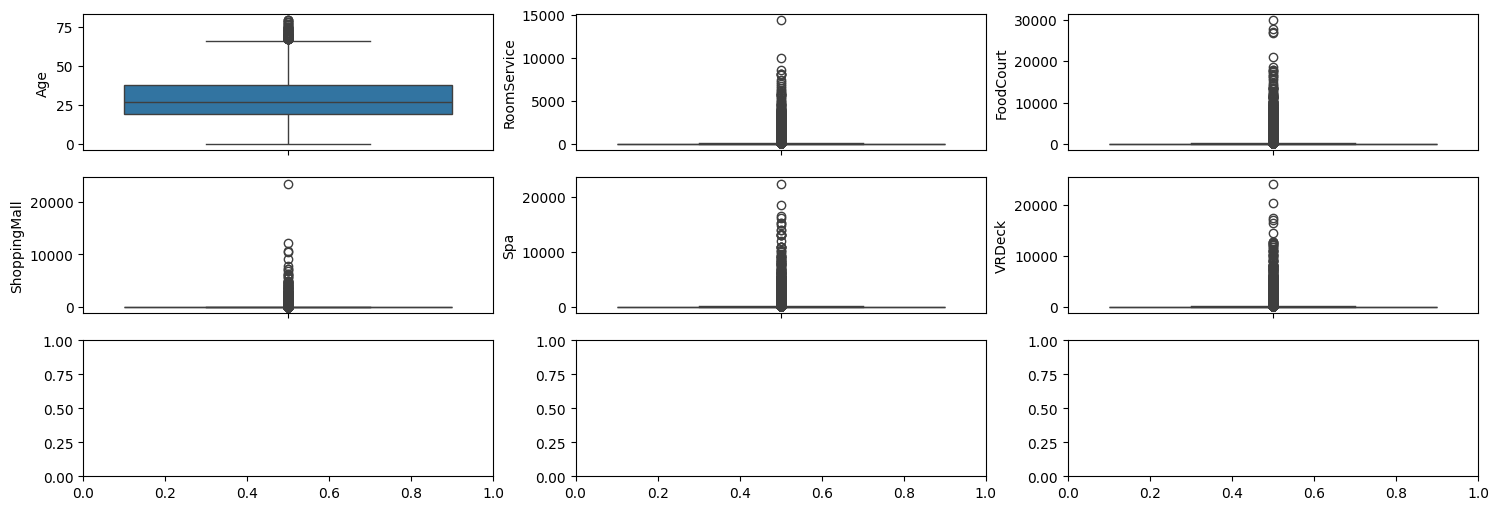

In [99]:
float_cols = df_train.select_dtypes(include=["float"]).columns
fig, axs = plt.subplots(3, 3, figsize=(18, 6))
for i, col in enumerate(float_cols):
    sns.boxplot(df_train[col], ax=axs[i//3, i%3])

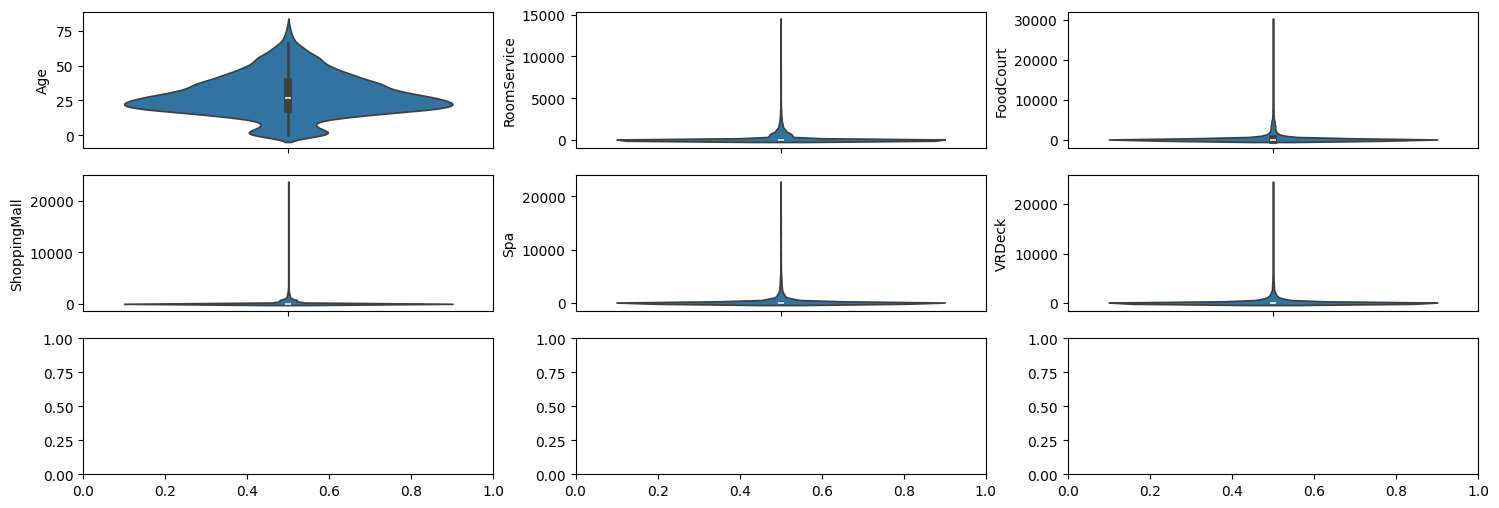

In [102]:
float_cols = df_train.select_dtypes(include=["float"]).columns
fig, axs = plt.subplots(3, 3, figsize=(18, 6))
for i, col in enumerate(float_cols):
    sns.violinplot(df_train[col], ax=axs[i//3, i%3])

<Axes: >

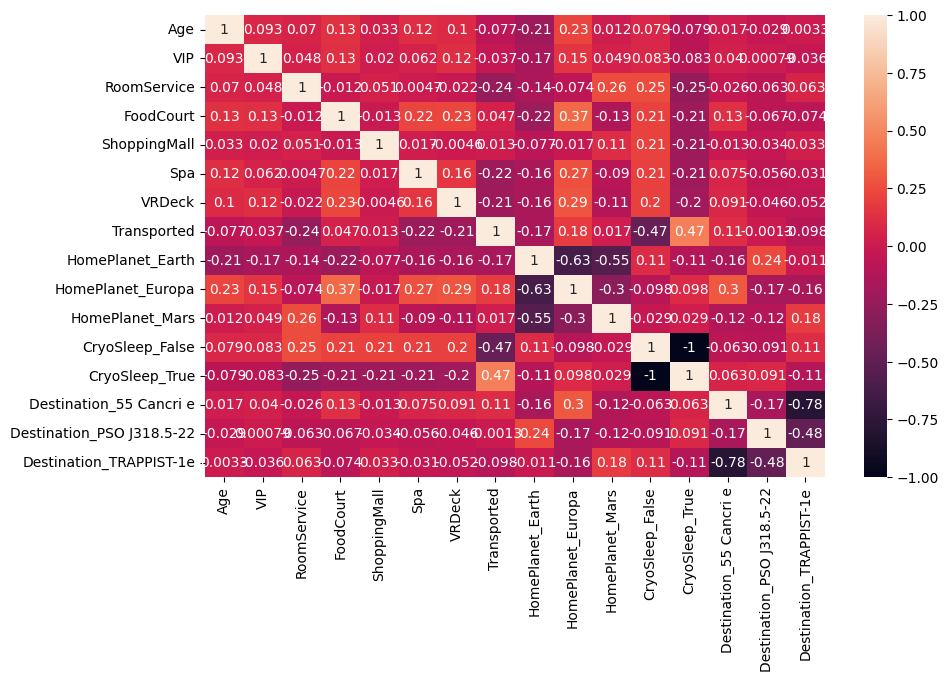

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(df_train.select_dtypes(include=["float", "int"]).corr(), annot=True, ax=ax)